### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

#---------------------------------------------

descent_config = {
    'descent_name': 'adam',
    'kwargs': {
        'dimension': dimension,
    }
}
regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

#------------------------------------------------

descent_config = {
    'descent_name': 'momentum',
    'kwargs': {
        'dimension': dimension,
    }
}
regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

<AxesSubplot:xlabel='price', ylabel='Count'>

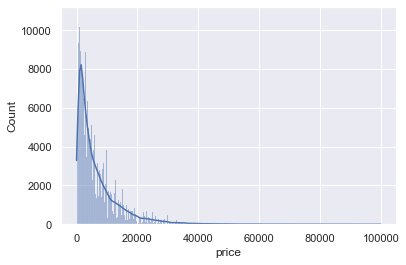

In [7]:
data = pd.read_csv('autos.csv')


sns.histplot(data['price'], kde=True)

Text(0, 0.5, 'count')

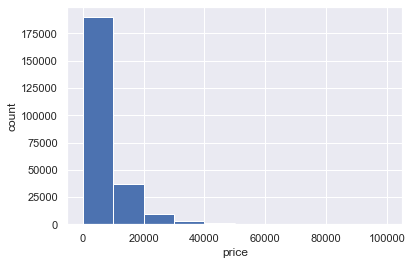

In [8]:
plt.hist(data['price'])
plt.xlabel('price')
plt.ylabel('count')

In [9]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


Между 75 квантилем и max значением существенная разница => есть выбросы. Удалим лишние данные и возьмем логарифм. Проверим

In [10]:
fixed_data = data.drop(data[data['price'] > data['price'].quantile(0.99)].index)
data['log_price'] = np.log1p(fixed_data['price'])
data.describe()

,powerPS,kilometer,autoAgeMonths,price,log_price
count,241190.000000,241190.000000,241190.000000,241190.000000,238814.000000
mean,131.271628,123766.677723,144.768676,6887.741892,8.240544
std,60.622613,39825.955933,73.092598,8024.451993,1.129789
min,51.000000,5000.000000,1.000000,1.000000,0.693147
25%,90.000000,100000.000000,92.000000,1750.000000,7.467942
50%,120.000000,150000.000000,140.000000,4100.000000,8.294300
75%,160.000000,150000.000000,192.000000,8999.000000,9.092570
max,589.000000,150000.000000,600.000000,99999.000000,10.542733


Text(0, 0.5, 'count')

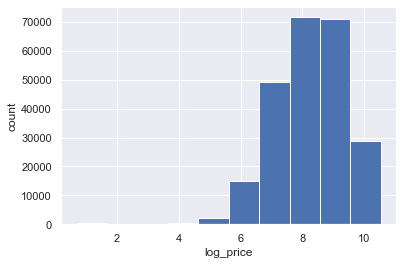

In [11]:
plt.hist(data['log_price'])
plt.xlabel('log_price')
plt.ylabel('count')

In [12]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313887
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188967
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.478510
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696667
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.601402


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [13]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['notRepairedDamage', 'gearbox']

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (EDA)

Изучим, как признаки влияют на целевую переменную

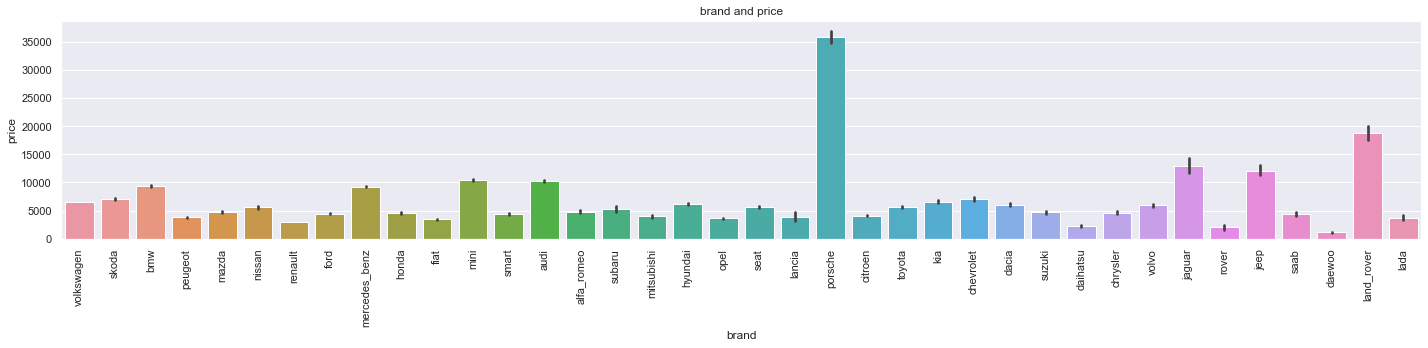

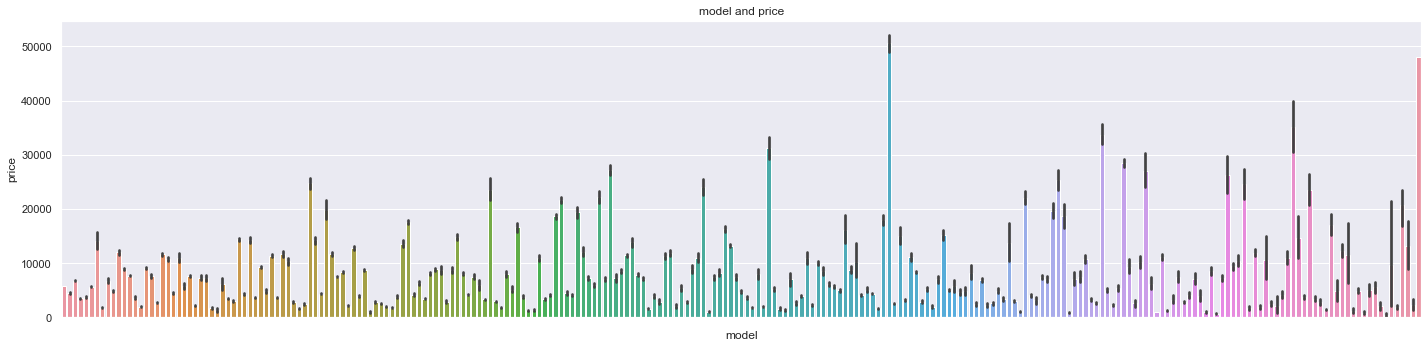

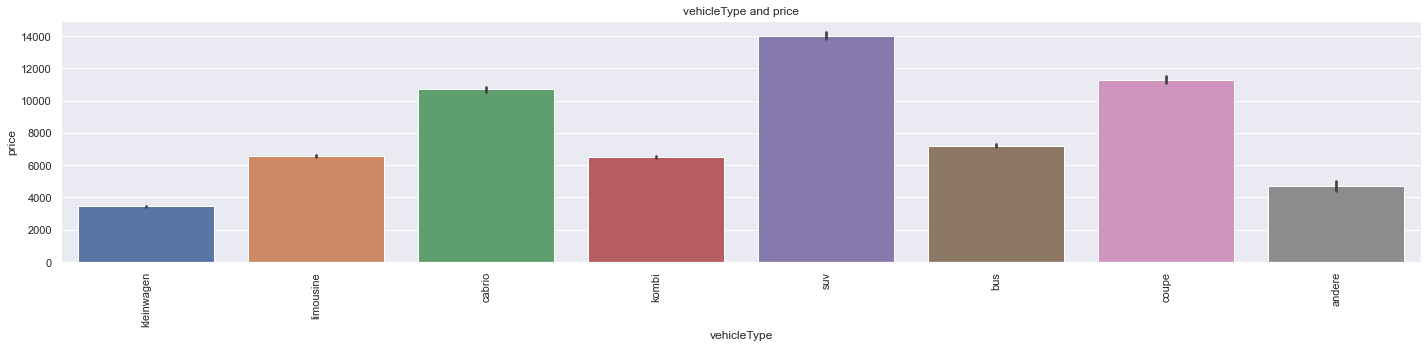

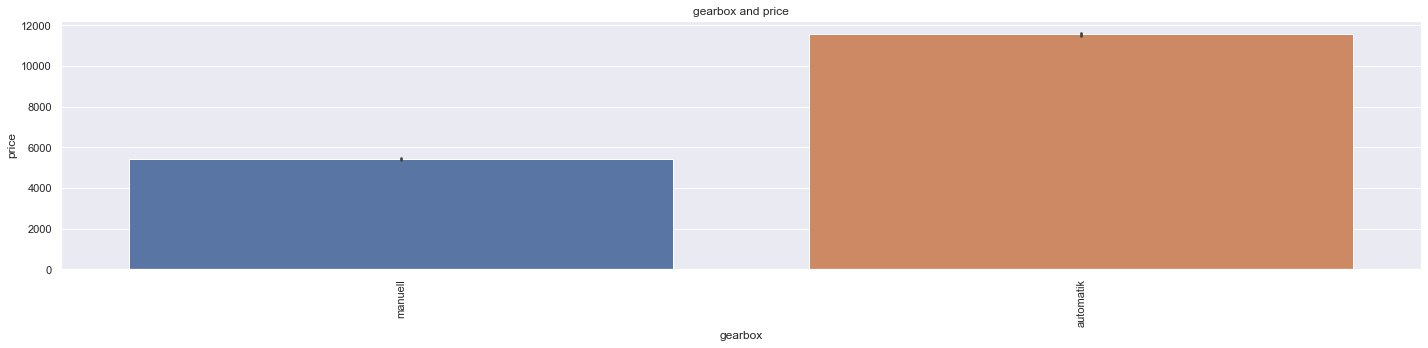

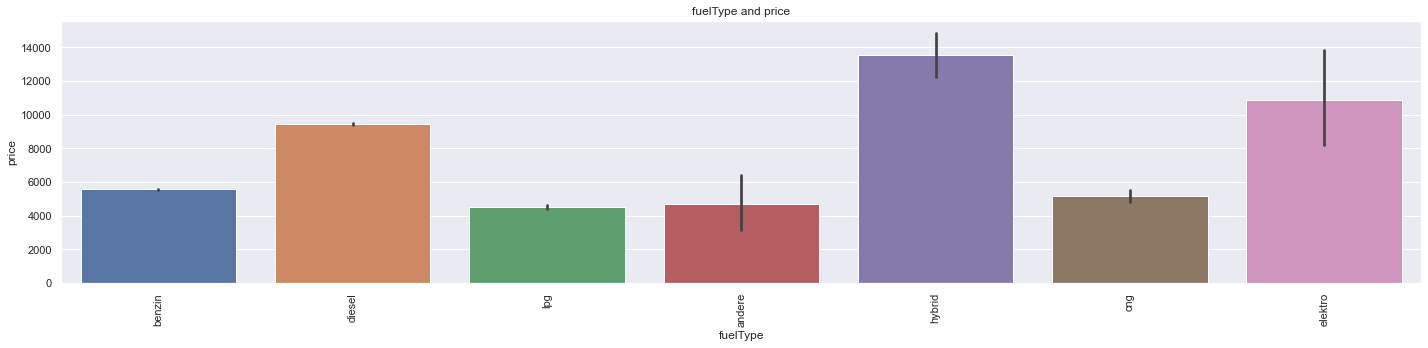

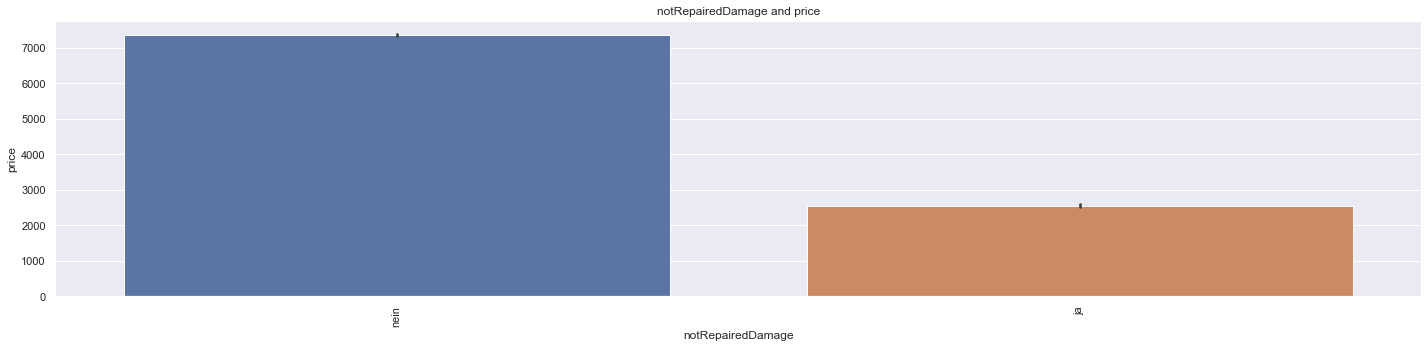

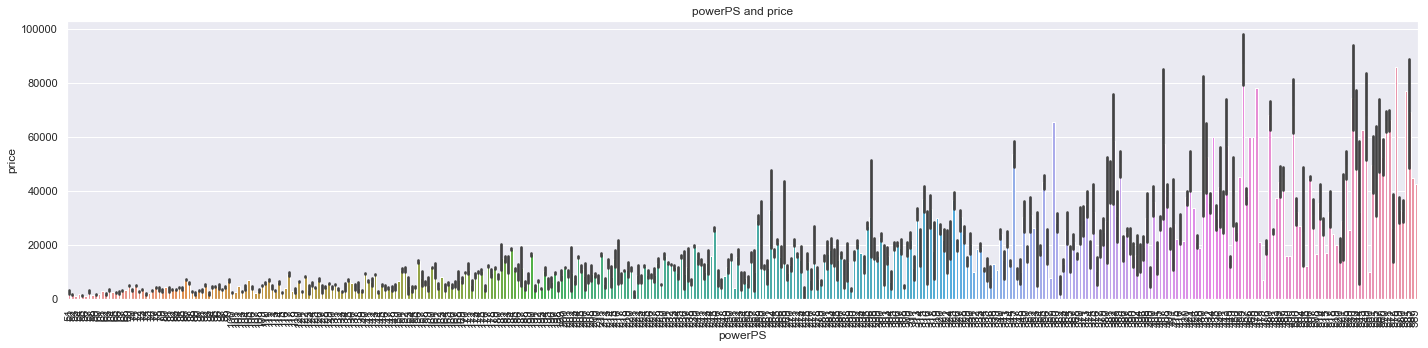

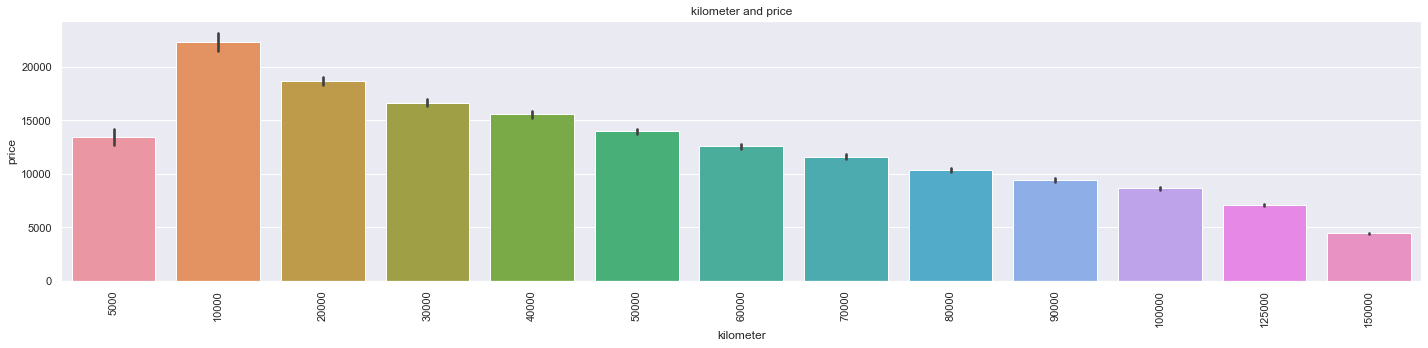

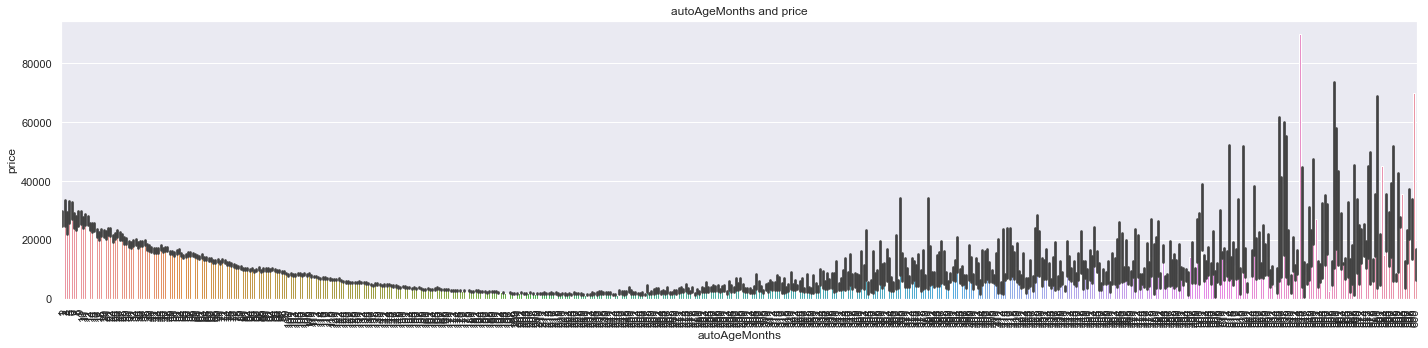

In [14]:
for feature in data.columns:
    if feature == 'price' or feature == 'log_price':
      continue


    fig, axs = plt.subplots(1, 1, figsize=(20, 5))

    sns.barplot(y = data['price'], x = data[feature], ax=axs)

    #plt.xlabel(feature, fontsize = 12)
    plt.title(feature + ' and price',fontsize = 12);
    plt.ylabel('price', fontsize = 12)
    plt.xticks(rotation=90)

    # чтоб не было нагромождено
    if feature in categorical and data[feature].nunique() > 50:
        axs.set_xticklabels([])

    plt.tight_layout()
    plt.show()

Видно, что самые дорогие автомобили ездят на бензине и дизеле. Видно, что porche - самая дорогая марка. Наиболее дорогостоящая автоматическая коробка передач. Машины без исправностей стоят намного дороже. С ростом мощности растет цена и т.д.

Изменим данные для корректной работы

In [14]:
data['notRepairedDamage'] = data['notRepairedDamage'].map({'ja': 1, 'nein': 0})
data['gearbox'] = data['gearbox'].map({'manuell': 1, 'automatik': 0})

In [15]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [17]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (data split into train/val/test):
from sklearn.model_selection import train_test_split

column_names = column_transformer.get_feature_names_out()
x = pd.DataFrame(x.toarray(), columns=column_names)

#разделим
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state = 40)
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size = 0.1,random_state = 40)
# x_valid и x_test содержат 10%
print(x_valid.shape[0]/x.shape[0])
print(x_test.shape[0]/x.shape[0])

0.09000373149798914
0.1


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [133]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ


from sklearn.metrics import r2_score
#from tqdm import tqdm

methods = ['full', 'stochastic','momentum', 'adam']

np.random.seed(10)
best_lambda = None
best_method = None
best_config = None
best_iter = None # это я так назвал, она может быть не самой лучшей. Best относится к loss
regression = None
best_r2 = None # это я так назвал, она может быть не самой лучшей. Best относится к loss

res = []
loss_history = []

best_loss = np.inf

for method in methods:
    best_loss = np.inf
    loss_history = []
    for l_ in np.logspace(-4, 1, 5):
        #print(method)


        descent_config = {
          'descent_name': method,
          'kwargs': {
              'dimension': x_train.shape[1],
              'lambda_': l_
          }
        }

        #print('------')
        regression = LinearRegression(descent_config=descent_config)
        #print('------')
        regression.fit(x_train.values, y_train.values)
        #print('------')
        cur_loss = regression.calc_loss(x_valid.values, y_valid.values)
        #print('------')

        #print(f'{method}. Итерации {len(regression.loss_history) - 1}. Лямбда {l_}. r2 {r2_score(y_test.values, regression.predict(x_test.values))}')

        if cur_loss < best_loss:
            best_method = descent
            best_loss = cur_loss
            best_lambda = l_ # это я так назвал, она может быть не самой лучшей. Best относится к loss
            best_config = descent_config
            best_iter = len(regression.loss_history) - 1 # это я так назвал, она может быть не самой лучшей. Best относится к loss

            #regression = LinearRegression(descent_config=descent_config)
            #regression.fit(x_test.values, y_test.values)
            best_r2 = r2_score(y_test.values, regression.predict(x_test.values)) # это я так назвал, она может быть не самой лучшей. Best относится к loss
            loss_history = regression.loss_history

    res.append({'method': method,'lambda': best_lambda,'loss': best_loss,'r2': best_r2,'iter': best_iter, 'loss_history' : loss_history})



#print(res)

In [134]:
res_mse = pd.DataFrame(res)
print('MSE')
print(res_mse)

MSE
       method     lambda          loss        r2  iter  \
0        full   0.562341  2.007554e+07  0.696941   500   
1  stochastic   0.562341  2.025672e+07  0.693333   500   
2    momentum   0.562341  1.749300e+07  0.743205   500   
3        adam  10.000000  7.438491e+07 -0.193174   500   

                                        loss_history  
0  [111713256.60520747, 59613133.28005956, 381065...  
1  [111708407.82166582, 58835913.564855985, 41714...  
2  [111713781.77732788, 59613376.396101385, 12216...  
3  [111710532.58118582, 110985779.05478695, 11039...  


Я выставлял итерации 300, 500, 1000 и т.д. К сожалению, 500 операций довольно мало, но если выставить больше, то это занимает довольно много времени (час и более). Поэтому я ограничен был 500 и 1000. В целом по full, stochastic, momentum довольно нормальный показатель для коэф. детерминации, модели обучены неплохо.

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

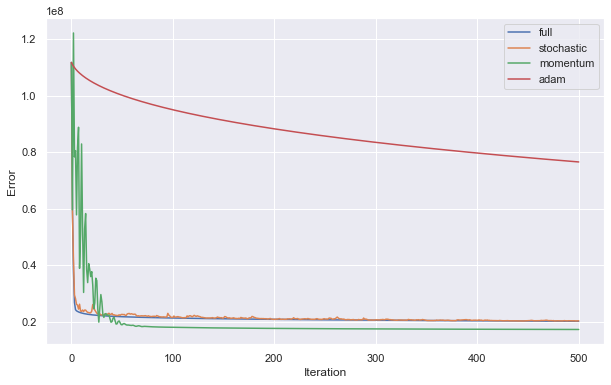

In [135]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

import matplotlib.pyplot as plt

#print(res)

ans_with_no_reg = res

#print(res[0]['method'])
#print(res[0]['loss_history'])

# нарисуем график

plt.figure(figsize=(10, 6))
methods = ['full','stochastic', 'momentum', 'adam']
for i, method in enumerate(methods):
    plt.plot(ans_with_no_reg[i]['loss_history'], label=method)

plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.show()

Full и Stochastic - идет очень быстрое снижение ошибки, а далее крайне медленно двигаем к её уменьшению. Momentum более плавно (по сравнению с Full и Stochastic) изменяет ошибку, более равномерно идет к минимуму. Adam идет очень плавно к ошибке, но не доходит до неё, 500 операций мало. Я пытался поставить 10000 итераций, но это ячейка выполнялась больше 2 часов, поэтому я не стал ждать

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

Text(0, 0.5, 'Iteration')

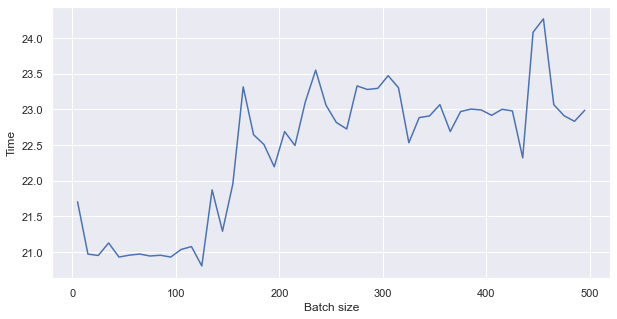

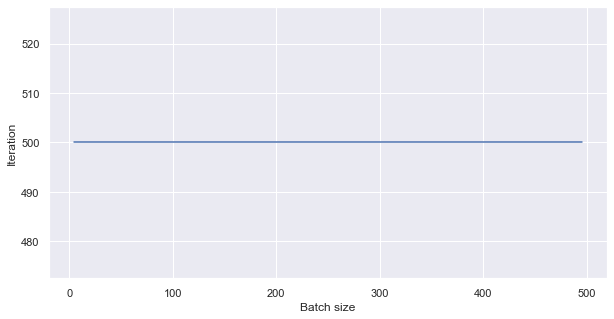

In [22]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
import time

batch_sizes = np.arange(5, 500, 10)
k = 5
mean_time = []
mean_iter = []

for batch_size in batch_sizes:
    times = []
    iterations = []

    for _ in range(k):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': res[1]['lambda'], # magic number. 1 == Стохастический
                'batch_size': batch_size
            }
        }
        regression = LinearRegression(descent_config=descent_config)

        start = time.time()
        regression.fit(x_train.values, y_train.values)

        times.append(time.time() - start)
        iterations.append((len(regression.loss_history)-1))


    mean_time.append(np.mean(times))
    mean_iter.append(np.mean(iterations))

# нарисуем

# зависимость среднего времени обучения от размера батча
_, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x=batch_sizes, y=mean_time, ax=ax)
plt.xlabel('Batch size',fontsize = 12)
plt.ylabel('Time',fontsize = 12)

# зависимость среднего количества итераций до сходимости от размера батча
_, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x=batch_sizes,y=mean_iter, ax=ax)
plt.xlabel('Batch size',fontsize = 12)
plt.ylabel('Iteration',fontsize = 12)



╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ


Так как у меня все методы доходят до максимального числа итераций, то итерация от батча - это простая константа. А насчет батча и итерации все тоже понятно, что не будет четкого ответа, ведь у меня ПРАКТИЧЕСКИ каждый раз модель доходила до 500 или 1000 (максимального числа итераций), поэтому четкой зависимости времени от батча не прослеживается :(


## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [136]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ


methods = ['full', 'stochastic','momentum', 'adam']

np.random.seed(10)
best_lambda = None
best_method = None
best_config = None
best_iter = None
best_mu = None
regression = None
best_r2_test = None
best_r2_train = None
loss_history = []

res = []
for i, method in enumerate(methods):
    best_loss = np.inf
    loss_history = []

    l_ = ans_with_no_reg[i]['lambda'] # берем лучшие лямбды
    print(l_)
    for mu_ in np.logspace(-4, 1, 5):
        #print(method)

        descent_config = {
          'descent_name': method, 'regularized': True,
          'kwargs': {
              'dimension': x_train.shape[1],
              'lambda_': l_
          }
        }

        #print('------')
        regression = LinearRegression(descent_config=descent_config)
        #print('------')
        regression.fit(x_train.values, y_train.values)
        #print('------')
        cur_loss = regression.calc_loss(x_valid.values, y_valid.values)
        #print('------')

        if cur_loss < best_loss:
            best_method = descent
            best_loss = cur_loss
            best_lambda = l_
            best_mu = mu_
            best_config = descent_config
            best_iter = len(regression.loss_history) - 1

            regression.fit(x_test.values, y_test.values)
            best_r2_test = r2_score(y_test.values, regression.predict(x_test.values))
            best_r2_train = r2_score(y_train.values, regression.predict(x_train.values))

            loss_history = regression.loss_history

    res.append({'method': method,'lambda': best_lambda,'mu': best_mu,'best_loss': best_loss,'r2_test':best_r2_test,'r2_train' : best_r2_train, 'iter': best_iter, 'loss_history' : loss_history})


0.5623413251903491
0.5623413251903491
0.5623413251903491
10.0


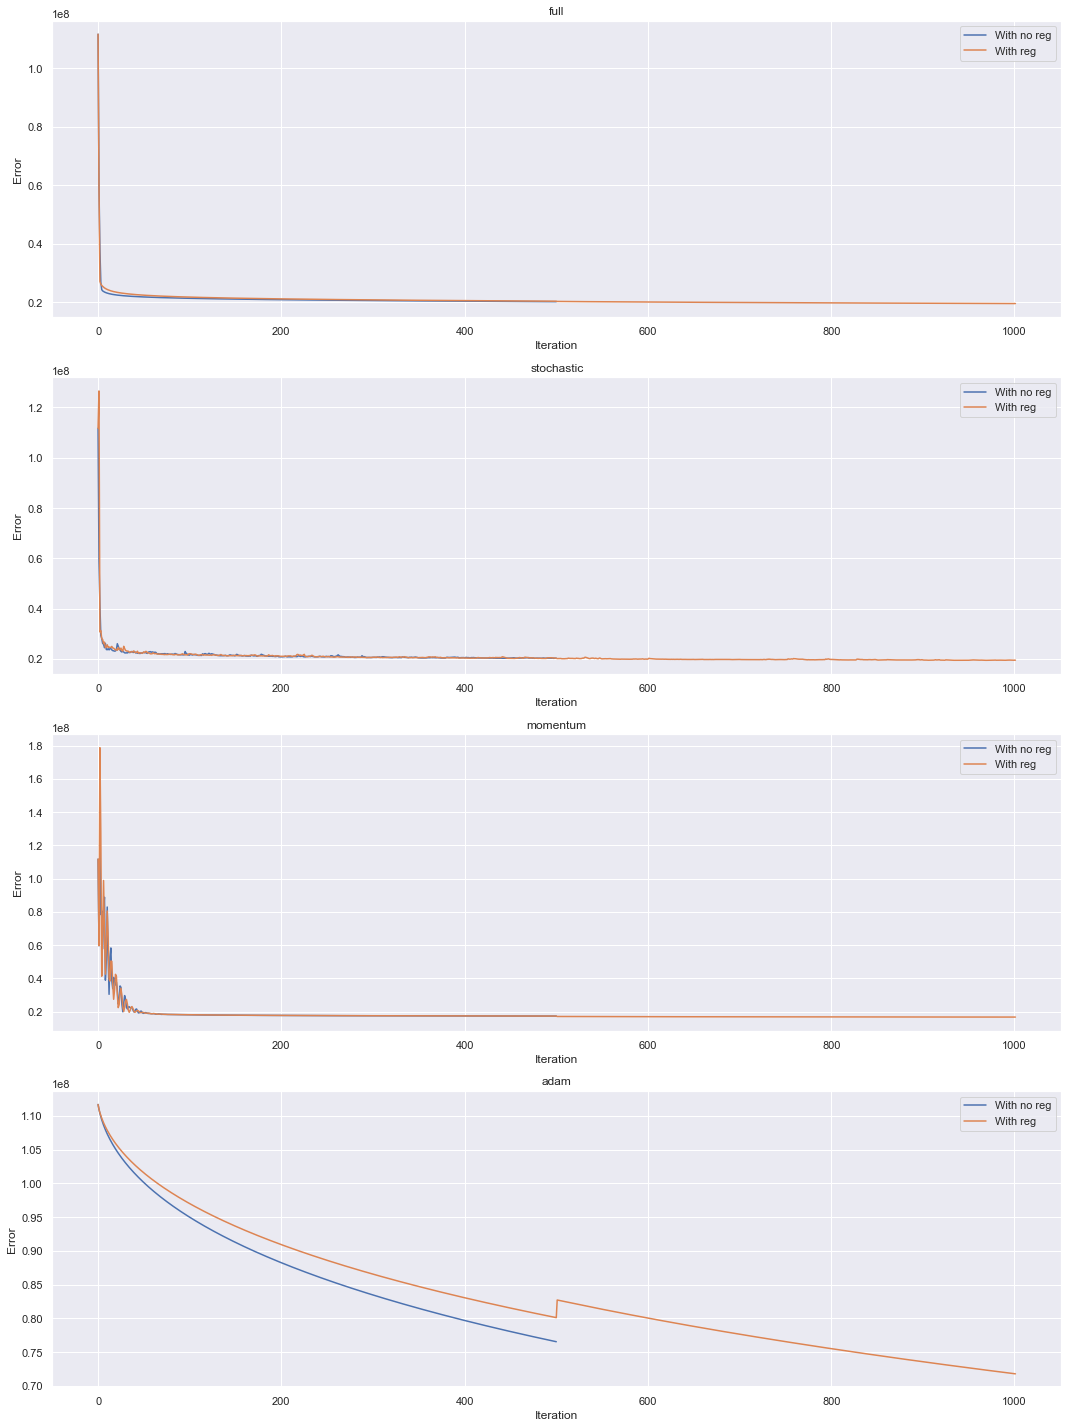

In [137]:

import matplotlib.pyplot as plt

ans_with_reg = res

# нарисуем графики

# создаем фигуру
_, ax = plt.subplots(len(ans_with_reg), 1, figsize=(15, len(ans_with_reg) * 5))

# Названия для графиков
methods = ['full', 'stochastic','momentum', 'adam']

for i in range(len(ans_with_reg)):
    # без регуляризации
    errors_with_no_req = ans_with_no_reg[i]['loss_history']
    ax[i].plot(errors_with_no_req, label='With no reg')

    # с регуляризацией
    errors_with_reg = ans_with_reg[i]['loss_history']
    ax[i].plot(errors_with_reg, label='With reg')

    ax[i].set_title(methods[i])
    ax[i].set_xlabel('Iteration')
    ax[i].set_ylabel('Error')
    ax[i].legend()  # для различения линий


plt.tight_layout()
plt.show()

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Тут получилось не очень красиво (т.к. я экспериментировал с 500 и 1000 число операций и сейчас последние часы для сдачи, поэтому прогнать могу не успеть еще раз). Сильного эффекта регуляризация не дала. Я взял те же лямбды, которые использовал без регуляризации. Возможно, ничего особо не поменялось, так как модель не была переобучена. В стохастическом спуске стало немного получше. Вообще, не все спуски потенциально готовы работать с регуляризацией, где-то она будет тормозить процесс сходимости.


## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [138]:
from descents import LossFunction
from sklearn.metrics import r2_score

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

methods = ['full','stochastic','momentum', 'adam']

np.random.seed(10)
best_loss = np.inf
best_lambda = None
best_method = None
best_config = None
best_iter = None
best_mu = None
regression = None
best_r2 = None

res = []
for i, method in enumerate(methods):
    best_loss = np.inf
    loss_history = []

    l_ = ans_with_no_reg[i]['lambda'] # берем лучшие лямбды

    descent_config = {
      'descent_name': method,
      'kwargs': {
          'dimension': x_train.shape[1],
          'loss_function': LossFunction.LogCosh,
          'lambda_': l_
      }
    }

    #print('------')
    regression = LinearRegression(descent_config=descent_config)
    #print('------')
    regression.fit(x_train.values, y_train.values)
    #print('------')
    cur_loss = regression.calc_loss(x_valid.values, y_valid.values)
    #print('------')

    print(cur_loss)

    if cur_loss < best_loss:
        best_method = descent
        best_loss = cur_loss
        best_lambda = l_
        best_config = descent_config
        best_iter = len(regression.loss_history) - 1

        #regression = LinearRegression(descent_config=descent_config)
        #regression.fit(x_test.values, y_test.values)
        best_r2 = r2_score(y_test.values, regression.predict(x_test.values))

    res.append({'method': method,'lambda': best_lambda,'best_loss': best_loss,'r2': best_r2, 'iter': best_iter})

res_log_cosh = pd.DataFrame(res)

6736.50391008932
6735.521717208125
6261.969040349407
4723.684185518984


In [139]:
print('LogCosh')
print(res_log_cosh)

LogCosh
       method     lambda    best_loss        r2  iter
0        full   0.562341  6736.503910 -0.727279   500
1  stochastic   0.562341  6735.521717 -0.727037   500
2    momentum   0.562341  6261.969040 -0.632412   500
3        adam  10.000000  4723.684186 -0.144264   500


Тут я взял те же лямбды, что и в задании 5. LogCosh дал очень слабый результат, коэффициент детерминации отрицательный...